# AUTHORS

- **Mathieu Breier**  
  *BSE DSDM 2023-2024*  
  Email: [mathieu.breier@bse.eu](mailto:mathieu.breier@bse.eu)

- **Guillem Mirabent**  
  *BSE DSDM 2023-2024*  
  Email: [guillem.mirabent@bse.eu](mailto:guillem.mirabent@bse.eu)

# INDEX

- [Loads and Imports](#loads-&-imports)

- [Data Exploration](#data-exploration)

- [Data Preparation](#data-preparation)

- [Train-Test Split](#train-test-split)

- [Random Assignation Model](#random-assignation-model)

- [Random Forest and XGB Models](#random-forest-and-xgb-models)

- [Results Preparation](#results-preparation)

- [Results](#results)

# LOADS & IMPORTS

[Back to Index](#index)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, roc_curve, auc, confusion_matrix

import klib as kl 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import plotly.express as px

import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from utils_preproc import *

import matplotlib.lines as mlines

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guillemmirabentrubinat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('../Spanish_Parliament_Speeches.csv')
data = kl.clean_column_names(data)
display(data)

,text_id,id,title,date,body,term,session,meeting,sitting,agenda,...,party_status,party_orientation,speaker_id,speaker_name,speaker_gender,speaker_birth,is_in_english,key,speech_text,speech_text_preprocessed
0,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u3,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Centro-derecha - Derecha,JaimeDeOlanoVela,"De Olano Vela, Jaime",M,1970,False,ParlaMint-ES_2022-06-29-CD220629.u3,"Gracias, presidenta. Señora Calviño, los dos ú...",gracias presidenta señora calviño dos último d...
1,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u5,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Coalition,Centro-izquierda,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",F,1968,False,ParlaMint-ES_2022-06-29-CD220629.u5,"Gracias, presidenta. Voy a responder a la preg...",gracias presidenta ir responder pregunta tener...
2,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u7,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Centro-derecha - Derecha,JaimeDeOlanoVela,"De Olano Vela, Jaime",M,1970,False,ParlaMint-ES_2022-06-29-CD220629.u7,"Señora Calviño, menos mal que funcionan sus me...",señora calviño menos mal funcionar medida infl...
3,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u9,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Coalition,Centro-izquierda,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",F,1968,False,ParlaMint-ES_2022-06-29-CD220629.u9,"Muchas gracias. Ya es mala suerte, señor Olano...",gracia ser malo suerte señor olano poner usted...
4,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u12,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Derecha - Extrema derecha,IvánEspinosaDeLosMonterosDeSimón,"Espinosa De Los Monteros De Simón, Iván",M,1971,False,ParlaMint-ES_2022-06-29-CD220629.u12,"Gracias, señora presidenta. Señora vicepreside...",gracias señora presidenta señora vicepresident...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u120,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda - izquierda,GabrielRufiánRomero,"Rufián Romero, Gabriel",M,1982,False,ParlaMint-ES_2016-11-15-CD161115.u120,"Señora presidenta, por alusiones, quería conte...",señora presidentar alusión querer contestar se...
32547,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u122,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda - izquierda,GabrielRufiánRomero,"Rufián Romero, Gabriel",M,1982,False,ParlaMint-ES_2016-11-15-CD161115.u122,Es la falsedad que ha comentado el portavoz de...,ser falsedad haber comentar portavoz grupo soc...
32548,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u124,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",M,1966,False,ParlaMint-ES_2016-11-15-CD161115.u124,"Señora presidenta, tengo un vídeo donde el señ...",señora presidenta tener vídeo señor rufián cua...
32549,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u126,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ánge

# DATA EXPLORATION

[Back to Index](#index)

In [3]:
data.columns

Index(['text_id', 'id', 'title', 'date', 'body', 'term', 'session', 'meeting',
       'sitting', 'agenda', 'subcorpus', 'lang', 'speaker_role', 'speaker_mp',
       'speaker_minister', 'speaker_party', 'speaker_party_name',
       'party_status', 'party_orientation', 'speaker_id', 'speaker_name',
       'speaker_gender', 'speaker_birth', 'is_in_english', 'key',
       'speech_text', 'speech_text_preprocessed'],
      dtype='object')

In [4]:
# data['speaker_party'].value_counts()

In [5]:
list_of_interest_parties = ['PP', 'PSOE', 'UP', 'Vox', 'ERC-S', 'JxCat-Junts', 'EAJ-PNV', 'EH Bildu', 'CiU', 'ERC-CATSÍ']

data = data[data['speaker_party'].isin(list_of_interest_parties)]
print(data['speaker_party'].value_counts())
# data

speaker_party
PP             6358
PSOE           6230
UP             2214
Vox            1888
EAJ-PNV        1853
ERC-S          1287
JxCat-Junts    1051
EH Bildu        800
CiU             419
ERC-CATSÍ       413
Name: count, dtype: int64


In [6]:
podemos_vox = ['UP', 'Vox']

data_pv = data[data['speaker_party'].isin(podemos_vox)]
data_pv['speaker_party'].value_counts()

speaker_party
UP     2214
Vox    1888
Name: count, dtype: int64

In [7]:
erc_junts = ['ERC-S', 'JxCat-Junts', 'CiU', 'ERC-CATSÍ']

data_ej = data[data['speaker_party'].isin(erc_junts)]
data_ej['speaker_party'].value_counts()

speaker_party
ERC-S          1287
JxCat-Junts    1051
CiU             419
ERC-CATSÍ       413
Name: count, dtype: int64

In [8]:
bildu_pnv = ['EAJ-PNV', 'EH Bildu']

data_bp = data[data['speaker_party'].isin(bildu_pnv)]
data_bp['speaker_party'].value_counts()

speaker_party
EAJ-PNV     1853
EH Bildu     800
Name: count, dtype: int64

In [9]:
psoe_pp = ['PP', 'PSOE']

data = data[data['speaker_party'].isin(psoe_pp)]
data['speaker_party'].value_counts()

speaker_party
PP      6358
PSOE    6230
Name: count, dtype: int64

# DATA PREPARATION

[Back to Index](#index)

In [10]:
data.loc[data['speaker_party'] == 'PSOE', 'speaker_party'] = 0
data.loc[data['speaker_party'] == 'PP', 'speaker_party'] = 1

In [11]:
data_pv.loc[data_pv['speaker_party'] == 'UP', 'speaker_party'] = 0
data_pv.loc[data_pv['speaker_party'] == 'Vox', 'speaker_party'] = 1

data_ej.loc[data_ej['speaker_party'] == 'ERC-S', 'speaker_party'] = 0
data_ej.loc[data_ej['speaker_party'] == 'JxCat-Junts', 'speaker_party'] = 1
data_ej.loc[data_ej['speaker_party'] == 'CiU', 'speaker_party'] = 1
data_ej.loc[data_ej['speaker_party'] == 'ERC-CATSÍ', 'speaker_party'] = 0

data_bp.loc[data_bp['speaker_party'] == 'EH Bildu', 'speaker_party'] = 0
data_bp.loc[data_bp['speaker_party'] == 'EAJ-PNV', 'speaker_party'] = 1

In [12]:
print(data['speaker_party'].value_counts(), data_pv['speaker_party'].value_counts(), data_ej['speaker_party'].value_counts(), data_bp['speaker_party'].value_counts())

speaker_party
1    6358
0    6230
Name: count, dtype: int64 speaker_party
0    2214
1    1888
Name: count, dtype: int64 speaker_party
0    1700
1    1470
Name: count, dtype: int64 speaker_party
1    1853
0     800
Name: count, dtype: int64


In [13]:
sel_cols = ['date', 'party_status', 'speaker_party', 'speaker_gender', 'speaker_id',  'speaker_birth', 'term', 'speech_text_preprocessed']

data = data[sel_cols]
data_pv = data_pv[sel_cols]
data_ej = data_ej[sel_cols]
data_bp = data_bp[sel_cols]

In [14]:
power_definer(data)
power_definer(data_pv)
power_definer(data_ej)
power_definer(data_bp)
data

,date,speaker_party,speaker_gender,speaker_id,speaker_birth,term,speech_text_preprocessed,party_in_power
0,2022-06-29,1,M,JaimeDeOlanoVela,1970,Legislatura XIV,gracias presidenta señora calviño dos último d...,0
1,2022-06-29,0,F,NadiaCalviñoSantamaría,1968,Legislatura XIV,gracias presidenta ir responder pregunta tener...,1
2,2022-06-29,1,M,JaimeDeOlanoVela,1970,Legislatura XIV,señora calviño menos mal funcionar medida infl...,0
3,2022-06-29,0,F,NadiaCalviñoSantamaría,1968,Legislatura XIV,gracia ser malo suerte señor olano poner usted...,1
5,2022-06-29,0,F,NadiaCalviñoSantamaría,1968,Legislatura XIV,gracia presidenta realidad ser semana precisam...,1
...,...,...,...,...,...,...,...,...
32544,2016-11-15,0,M,MiguelÁngelHerediaDíaz,1966,Legislatura XII,caso dinero público deber ser gastar honestida...,0
32545,2016-11-15,1,M,JaimeEduardoDeOlanoVela,1970,Legislatura XII,gracias señora presidenta debatimos hoy confor...,1
32548,2016-11-15,0,M,MiguelÁngelHerediaDíaz,1966,Legislatura XII,señora presidenta tener vídeo señor rufián cua...,0
32549,2016-11-15,0,M,MiguelÁngelHerediaDíaz,1966,Legislatura XII,evidentemente poder enseñar vídeo señora presi...,0


In [15]:
print(data['speaker_birth'].unique())
print(data_pv['speaker_birth'].unique())
print(data_ej['speaker_birth'].unique())
print(data_bp['speaker_birth'].unique())

['1970' '1968' '1967' '1966' '1959' '1962' '1976' '1978' '1965' '1977'
 '1949' '1969' '-' '1973' '1980' '1974' '1972' '1961' '1958' '1952' '1954'
 '1984' '1975' '1982' '1971' '1963' '1990' '1979' '1964' '1983' '1986'
 '1993' '1981' '1991' '1985' '1960' '1956' '1992' '1957' '1987' '1989'
 '1953' '1951' '1948' '1944' '1950' '1947' '1955' '1937' '1945' '1946'
 '1943']
['1971' '1988' '1957' '1985' '1962' '1951' '1964' '1958' '1976' '1970'
 '1972' '1965' '1968' '1963' '1960' '1974' '1969' '1979' '1973' '1966'
 '1959' '1977' '1983' '1984' '1978' '1993' '1975' '1947' '1967' '1989'
 '1980' '1952' '1986' '1955' '1987' '1981' '1956' '1961' '1950' '1990'
 '1992' '1982']
['1972' '1975' '1967' '1989' '1982' '1996' '1980' '1965' '1981' '1988'
 '1969' '1964' '1979' '1970' '1977' '1963' '1976' '1966' '1974' '1960'
 '1973' '1949' '1952' '1962' '1956' '1971' '-' '1953' '1954' '1961']
['1959' '1979' '1972' '1965' '1956' '1962' '1960' '1966' '1969' '1954'
 '1957' '1968']


In [16]:
data_ej[data_ej['speaker_birth'] == '-']

,date,speaker_party,speaker_gender,speaker_id,speaker_birth,term,speech_text_preprocessed,party_in_power
8138,2015-10-14,1,F,CarmenCastellanoiFernández,-,Legislatura X,gracias señor presidente ahora legislación mat...,0
8533,2015-10-13,1,F,CarmenCastellanoiFernández,-,Legislatura X,señor presidente señoría vaya delante unió dem...,0
9447,2015-10-01,1,F,CarmenCastellanoiFernández,-,Legislatura X,prometo aplausos,0


In [17]:
""" Cleaning a typo on the name of a specific speaker. """

data.loc[data['speaker_id'] == 'CarmenRiobolosRegadera', 'speaker_id'] = 'CarmenRiolobosRegadera'

In [18]:
""" Some of the birth years are missing, so we input them manually from publicly available information. """

age_dict = {
    'JuanLuisSotoBurillo': 1978,
    'JoséCarlosDuránPeralta': 1987,
    'JoséCarlosDíazRodríguez': 1967,
    'CarmenRiolobosRegadera': 1953,
    'MaríaDelMarArnaizGarcía': 1966,
    'JoséIgnacioWertOrtega': 1950,
    'JoséManuelGarcíaMargalloyMarfil': 1944,
    'JulioVillarrubiaMediavilla': 1957,
    'EmilioBarbónMartínez': 1930,
    'CarmenCastellanoiFernández': 1959
}



In [19]:
# map speaker to age 
data.loc[data['speaker_birth'] == '-', 'speaker_birth'] = data.loc[data['speaker_birth'] == '-', 'speaker_id'].map(age_dict)
data_ej.loc[data_ej['speaker_birth'] == '-', 'speaker_birth'] = data_ej.loc[data_ej['speaker_birth'] == '-', 'speaker_id'].map(age_dict)
data['speaker_birth'].unique()

array(['1970', '1968', '1967', '1966', '1959', '1962', '1976', '1978',
       '1965', '1977', '1949', '1969', 1978, '1973', '1980', '1974',
       '1972', '1961', '1958', '1952', 1987, '1954', '1984', '1975',
       '1982', '1971', '1963', '1990', '1979', '1964', '1983', '1986',
       '1993', '1981', '1991', '1985', 1967, '1960', '1956', '1992',
       '1957', '1987', '1989', '1953', 1953, 1966, '1951', '1948', '1944',
       '1950', '1947', '1955', '1937', 1950, '1945', 1944, 1957, 1930,
       '1946', '1943'], dtype=object)

In [20]:
data

,date,speaker_party,speaker_gender,speaker_id,speaker_birth,term,speech_text_preprocessed,party_in_power
0,2022-06-29,1,M,JaimeDeOlanoVela,1970,Legislatura XIV,gracias presidenta señora calviño dos último d...,0
1,2022-06-29,0,F,NadiaCalviñoSantamaría,1968,Legislatura XIV,gracias presidenta ir responder pregunta tener...,1
2,2022-06-29,1,M,JaimeDeOlanoVela,1970,Legislatura XIV,señora calviño menos mal funcionar medida infl...,0
3,2022-06-29,0,F,NadiaCalviñoSantamaría,1968,Legislatura XIV,gracia ser malo suerte señor olano poner usted...,1
5,2022-06-29,0,F,NadiaCalviñoSantamaría,1968,Legislatura XIV,gracia presidenta realidad ser semana precisam...,1
...,...,...,...,...,...,...,...,...
32544,2016-11-15,0,M,MiguelÁngelHerediaDíaz,1966,Legislatura XII,caso dinero público deber ser gastar honestida...,0
32545,2016-11-15,1,M,JaimeEduardoDeOlanoVela,1970,Legislatura XII,gracias señora presidenta debatimos hoy confor...,1
32548,2016-11-15,0,M,MiguelÁngelHerediaDíaz,1966,Legislatura XII,señora presidenta tener vídeo señor rufián cua...,0
32549,2016-11-15,0,M,MiguelÁngelHerediaDíaz,1966,Legislatura XII,evidentemente poder enseñar vídeo señora presi...,0


In [21]:
data['speaker_birth'] = data['speaker_birth'].astype(int)
data_pv['speaker_birth'] = data_pv['speaker_birth'].astype(int)
data_ej['speaker_birth'] = data_ej['speaker_birth'].astype(int)
data_bp['speaker_birth'] = data_bp['speaker_birth'].astype(int)

In [22]:
age_getter(data)
age_getter(data_pv)
age_getter(data_ej)
age_getter(data_bp)
data

,date,speaker_party,speaker_gender,speaker_id,term,speech_text_preprocessed,party_in_power,speaker_age
0,2022-06-29,1,M,JaimeDeOlanoVela,Legislatura XIV,gracias presidenta señora calviño dos último d...,0,52
1,2022-06-29,0,F,NadiaCalviñoSantamaría,Legislatura XIV,gracias presidenta ir responder pregunta tener...,1,54
2,2022-06-29,1,M,JaimeDeOlanoVela,Legislatura XIV,señora calviño menos mal funcionar medida infl...,0,52
3,2022-06-29,0,F,NadiaCalviñoSantamaría,Legislatura XIV,gracia ser malo suerte señor olano poner usted...,1,54
5,2022-06-29,0,F,NadiaCalviñoSantamaría,Legislatura XIV,gracia presidenta realidad ser semana precisam...,1,54
...,...,...,...,...,...,...,...,...
32544,2016-11-15,0,M,MiguelÁngelHerediaDíaz,Legislatura XII,caso dinero público deber ser gastar honestida...,0,50
32545,2016-11-15,1,M,JaimeEduardoDeOlanoVela,Legislatura XII,gracias señora presidenta debatimos hoy confor...,1,46
32548,2016-11-15,0,M,MiguelÁngelHerediaDíaz,Legislatura XII,señora presidenta tener vídeo señor rufián cua...,0,50
32549,2016-11-15,0,M,MiguelÁngelHerediaDíaz,Legislatura XII,evidentemente poder enseñar vídeo señora presi...,0,50


In [23]:
print(data.speaker_gender.unique())
print(data_pv.speaker_gender.unique())
print(data_ej.speaker_gender.unique())
print(data_bp.speaker_gender.unique())

['M' 'F' 'U']
['M' 'F']
['M' 'F']
['M' 'F']


In [24]:
""" 
We are very certain that the Unknown gender is actually Female.
This comes from the fact that the speaker with the 'U' is Carmen Riolobos Regaders,
who is enlisted in Partido Popular, rather conservative party, so she probably does not identify with
a gender other than Male or Female.
"""

data.loc[data.speaker_gender == 'U', 'speaker_gender'] = 'F'
data.speaker_gender.unique()

array(['M', 'F'], dtype=object)

In [25]:
gender_map = {
    'M': 1,
    'F': 0
}

data['speaker_gender'] = data['speaker_gender'].map(gender_map)
data_pv['speaker_gender'] = data_pv['speaker_gender'].map(gender_map)
data_ej['speaker_gender'] = data_ej['speaker_gender'].map(gender_map)
data_bp['speaker_gender'] = data_bp['speaker_gender'].map(gender_map)

print(data.speaker_gender.unique())

[1 0]


In [26]:
print(data.term.unique())
print(data_pv.term.unique())
print(data_ej.term.unique())
print(data_bp.term.unique())

['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
['Legislatura XIV' 'Legislatura XII' 'Legislatura XIII' 'Legislatura XI']
['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']


In [27]:
# label encode term columns 
print(data.term.unique())

term_map = {
    'Legislatura X': 0,
    'Legislatura XI': 1,
    'Legislatura XII': 2,
    'Legislatura XIII': 3,
    'Legislatura XIV': 4
}

data['term'] = data['term'].map(term_map)
data_pv['term'] = data_pv['term'].map(term_map)
data_ej['term'] = data_ej['term'].map(term_map)
data_bp['term'] = data_bp['term'].map(term_map)
print(data.term.unique())

['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
[4 0 2 3 1]


In [28]:
data.dropna(subset=['speech_text_preprocessed'], inplace=True)
data_pv.dropna(subset=['speech_text_preprocessed'], inplace=True)
data_ej.dropna(subset=['speech_text_preprocessed'], inplace=True)
data_bp.dropna(subset=['speech_text_preprocessed'], inplace=True)

In [29]:
# splite speech_text_preprocessed into list of words

data['speech_text_preprocessed_tokenized'] = data['speech_text_preprocessed'].str.split()
data_pv['speech_text_preprocessed_tokenized'] = data_pv['speech_text_preprocessed'].str.split()
data_ej['speech_text_preprocessed_tokenized'] = data_ej['speech_text_preprocessed'].str.split()
data_bp['speech_text_preprocessed_tokenized'] = data_bp['speech_text_preprocessed'].str.split()

In [30]:
# cut off len of speech text > 100 

print(data.shape)

min_len = 100

data = brickwall_limiter(data, 'speech_text_preprocessed_tokenized', min_len)
data_pv = brickwall_limiter(data_pv, 'speech_text_preprocessed_tokenized', min_len)
data_ej = brickwall_limiter(data_ej, 'speech_text_preprocessed_tokenized', min_len)
data_bp = brickwall_limiter(data_bp, 'speech_text_preprocessed_tokenized', min_len)

print(data.shape)

(12580, 9)
(7921, 10)


In [31]:
max_tokens_split = 300

print(data.shape)

data = limit_splitter(data, max_tokens_split)
data_pv = limit_splitter(data_pv, max_tokens_split)
data_ej = limit_splitter(data_ej, max_tokens_split)
data_bp = limit_splitter(data_bp, max_tokens_split)

# data = split_token_lists_in_df(data, 'speech_text_preprocessed_tokenized', 300)
# data['speech_text_preprocessed_len'] = data['speech_text_preprocessed_tokenized'].astype(str).apply(lambda x: len(x))
print(data.shape)

(7921, 10)
(15952, 10)


In [32]:
data = brickwall_limiter(data, 'speech_text_preprocessed_tokenized', min_len)
data_pv = brickwall_limiter(data_pv, 'speech_text_preprocessed_tokenized', min_len)
data_ej = brickwall_limiter(data_ej, 'speech_text_preprocessed_tokenized', min_len)
data_bp = brickwall_limiter(data_bp, 'speech_text_preprocessed_tokenized', min_len)

print(data.shape)

(14482, 10)


In [33]:
data

,date,speaker_party,speaker_gender,speaker_id,term,speech_text_preprocessed,party_in_power,speaker_age,speech_text_preprocessed_tokenized,speech_text_preprocessed_len
0,2022-06-29,1,1,JaimeDeOlanoVela,4,señora calviño menos mal funcionar medida infl...,0,52,"[señora, calviño, menos, mal, funcionar, medid...",166
1,2022-06-29,0,0,NadiaCalviñoSantamaría,4,gracia ser malo suerte señor olano poner usted...,1,54,"[gracia, ser, malo, suerte, señor, olano, pone...",146
2,2022-06-29,0,0,NadiaCalviñoSantamaría,4,gracia presidenta realidad ser semana precisam...,1,54,"[gracia, presidenta, realidad, ser, semana, pr...",103
3,2022-06-29,0,0,NadiaCalviñoSantamaría,4,señor espinosa monteros ser evidente tener lug...,1,54,"[señor, espinosa, monteros, ser, evidente, ten...",125
4,2022-06-29,0,0,NadiaCalviñoSantamaría,4,gracias presidenta quedar ninguno duda haber p...,1,54,"[gracias, presidenta, quedar, ninguno, duda, h...",178
...,...,...,...,...,...,...,...,...,...,...
15947,2016-11-15,0,1,MiguelÁngelHerediaDíaz,2,señora presidenta señoría contar amigo josé an...,0,50,"[señora, presidenta, señoría, contar, amigo, j...",111
15948,2016-11-15,0,1,MiguelÁngelHerediaDíaz,2,caso dinero público deber ser gastar honestida...,0,50,"[caso, dinero, público, deber, ser, gastar, ho...",212
15949,2016-11-15,1,1,JaimeEduardoDeOlanoVela,2,gracias señora presidenta debatimos hoy confor...,1,46,"[gracias, señora, presidenta, debatimos, hoy, ...",300
15950,2016-11-15,1,1,JaimeEduardoDeOlanoVela,2,gracias señora presidenta debatimos hoy confor...,1,46,"[web, transparencia, parlamento, catalán, mues...",143


In [34]:
# data.to_csv('preprocessed_data.csv', index=False)

Names to be removed since they are giveaways:
- pedro, sánchez
- pablo, casado
- iglesias
- mariano, rajoy
- santiago, abascal
- cristóbal, montoro
- psoe, partido socialista
- podemos
- maría, montero
- partido popular, pp
- mariano, rajoy
- comú, podem
- junts, per
- vox
- partido nacionalista vasco, pnv
- simón
- feijóo
- aznar
- arrimadas
- illa, salvador
- calviño
- ábalos
- robles
- zapatero
- marlaska
- espinosa

We also take out the names of the presidents of the chamber:
- francina, armengol
- meritxell, batet
- ana, pastor
- patxi, lópez
- jesús, posada

In [35]:
"""
Without taking those giveaways out the model is performing at over 90% ROC AUC scores for the
PSOE-PP test set. This is good for this specific model, but it sacrifices a little bit of 
performance with regards to the Podemos-Vox test set.
"""

giveaways = ['pedro', 'sánchez', 'pablo', 'casado', 'mariano', 'rajoy', 'santiago', 'abascal', 
                'cristóbal', 'montoro', 'psoe', 'socialista', 'podemos', 'maría', 'montero', 'bildu', 
                'partido', 'popular', 'pp', 'mariano', 'rajoy', 'comú', 'podem', 'junts', 'per', 'vox',
                'vasco', 'pnv', 'simón', 'feijóo', 'aznar', 'arrimadas', 'illa', 'iglesias',
                'salvador', 'calviño', 'ábalos', 'robles', 'zapatero', 'marlaska', 'espinosa',
                'señora', 'señor', 'ministra', 'ministro', 'presidente', 'presidenta', 'gobierno', 
                'ser', 'haber', 'hacer', 'francina', 'armengol', 'decir', 'gracias', 'usted',
                'meritxell', 'batet', 'ana', 'pastor', 'patxi', 'lópez', 'jesús', 'posada']


spanish_stop_words = set(stopwords.words('spanish'))

# Combine the NLTK and custom stop words
custom_stopwords = spanish_stop_words.union(giveaways)

words_relevant = ['no', 'sí', 'bien', 'mal', 'me', 'mí']
for word in words_relevant:
    custom_stopwords.discard(word)

"""
If you want to run the model without those stopwords, just uncomment the line below.
"""
# custom_stopwords = spanish_stop_words

'\nIf you want to run the model without those stopwords, just uncomment the line below.\n'

# TRAIN-TEST SPLIT

[Back to Index](#index)

In [36]:
# Unique politicians and their party labels (assuming one politician belongs to only one party)
unique_politicians = data.groupby('speaker_id')['speaker_party'].first().reset_index()

# Splitting unique politicians into train and test to ensure no overlap
train_politicians, test_politicians = train_test_split(unique_politicians, stratify=unique_politicians['speaker_party'], test_size=0.3, random_state=23)

# Selecting rows for the train and test datasets based on the split politicians
train_df = data[data['speaker_id'].isin(train_politicians['speaker_id'])]
test_df = data[data['speaker_id'].isin(test_politicians['speaker_id'])]

In [37]:
print(train_df['term'].value_counts())
print(test_df['term'].value_counts())

term
4    4022
2    3693
0    1353
1     146
3     102
Name: count, dtype: int64
term
4    2484
2    1417
0     990
3     176
1      99
Name: count, dtype: int64


In [38]:
print(train_df.shape)
print(test_df.shape)

# get intersection of speaker id in train and test
train_speaker_ids = train_df['speaker_id'].unique()
test_speaker_ids = test_df['speaker_id'].unique()

intersection = list(set(train_speaker_ids) & set(test_speaker_ids))
print(intersection)


(9316, 10)
(5166, 10)
[]


In [39]:
# split is near 50% 
print(train_df.speaker_party.value_counts())
print(test_df.speaker_party.value_counts())

speaker_party
1    4943
0    4373
Name: count, dtype: int64
speaker_party
0    2796
1    2370
Name: count, dtype: int64


In [40]:
train_x = train_df['speech_text_preprocessed']
train_y = train_df['speaker_party']
test_x = test_df['speech_text_preprocessed']
test_y = test_df['speaker_party']

test_pv_x = data_pv['speech_text_preprocessed']
test_pv_y = data_pv['speaker_party']

test_ej_x = data_ej['speech_text_preprocessed']
test_ej_y = data_ej['speaker_party']

test_bp_x = data_bp['speech_text_preprocessed']
test_bp_y = data_bp['speaker_party']

# RANDOM ASSIGNATION MODEL

[Back to Index](#index)

We will use a random assignation model as a baseline model. This model will assign a random probability to each observation.

In [41]:
pred_test_baseline = np.random.randint(0, 2, size=len(test_y))

pred_baseline = np.random.uniform(low=0, high=1, size=len(test_y))
pred_baseline = np.round(pred_baseline, 6)

# RANDOM FOREST AND XGB MODELS

[Back to Index](#index)

In [42]:
#pipeline with TF-IDF and RandomForestClassifier to be expanded with grids
pipeline = Pipeline([
    
    ('tfidf', TfidfVectorizer(
        max_df = 0.4,
        min_df = 0.01,
        ngram_range = (1, 2),
        stop_words=list(custom_stopwords)
        )),

    ('clf', RandomForestClassifier(
        bootstrap = False,
        min_samples_leaf = 1,
        min_samples_split = 2,
        n_estimators = 1000,
        max_depth = 50,
        verbose = 1,
        n_jobs = -1
        )),
]) 

param_grid = {
    'tfidf__max_df': [0.5], #max occurrence of words
    'tfidf__min_df': [0.01],  #minimum occurrences of words
    'tfidf__ngram_range': [(1, 2)],#, (1, 3)], #different n-gram options
    'clf__n_estimators': [500],  # Number of trees in the forest
    'clf__max_features': ['sqrt'],  # Number of features to consider at every split
    'clf__max_depth': [10],  # Maximum number of levels in tree
    'clf__min_samples_split': [2],  # Minimum number of samples required to split a node
    'clf__min_samples_leaf': [4],  # Minimum number of samples required at each leaf node
    'clf__bootstrap': [False]  # Method of selecting samples for training each tree
} 
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=3, scoring='roc_auc')

# grid_search.fit(train_x, train_y)
# model_rf = grid_search.best_estimator_
# for param in grid_search.best_params_:
#     print(param, ":", grid_search.best_params_[param])

# print(grid_search.best_score_)

model_rf = pipeline.fit(train_x, train_y)

model_rf.fit(train_x, train_y)

pred_train = model_rf.predict(train_x)
pred_test = model_rf.predict(test_x)

y_pred = model_rf.predict_proba(test_x)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   

In [43]:
#pipeline with TF-IDF and GradientBoostingClassifier to be expanded with grids
pipeline_xgb = Pipeline([
    
    ('tfidf', TfidfVectorizer(
        max_df = 0.4,
        min_df = 0.01,
        ngram_range = (1, 3),
        stop_words=list(custom_stopwords)
        )),

    ('clf', GradientBoostingClassifier(
        max_depth = 10,
        max_features = 'sqrt',
        min_samples_leaf = 1,
        min_samples_split = 2,
        n_estimators = 1000,
        verbose = 1
        )),
]) 

param_grid_xgb = {
    'tfidf__max_df': [0.5], #max occurrence of words
    'tfidf__min_df': [0.01],  #minimum occurrences of words
    'tfidf__ngram_range': [(1, 2)],#, (1, 3)], #different n-gram options
    'clf__n_estimators': [1000],  # Number of trees in the forest
    'clf__max_features': ['sqrt']#, None],  # Number of features to consider at every split
    # 'clf__max_depth': [5, 10],  # Maximum number of levels in tree
    # 'clf__min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    # 'clf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
} 
# grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, n_jobs=-1, verbose=3, scoring='roc_auc')

# grid_search_xgb.fit(train_x, train_y)
# model_xgb = grid_search_xgb.best_estimator_
# for param in grid_search_xgb.best_params_:
#     print(param, ":", grid_search_xgb.best_params_[param])

# print(grid_search_xgb.best_score_)

model_xgb = pipeline_xgb.fit(train_x, train_y)

model_xgb.fit(train_x, train_y)

pred_train_xgb = model_xgb.predict(train_x)
pred_test_xgb = model_xgb.predict(test_x)

y_pred_xgb = model_xgb.predict_proba(test_x)[:,1]

      Iter       Train Loss   Remaining Time 
         1           1.3335            1.10m
         2           1.2916            1.00m
         3           1.2480            1.00m
         4           1.2110           58.18s
         5           1.1771           56.95s
         6           1.1454           56.46s
         7           1.1148           54.79s
         8           1.0865           52.77s
         9           1.0632           51.15s
        10           1.0407           50.57s
        20           0.8203           47.86s
        30           0.6888           45.00s
        40           0.5950           42.95s
        50           0.5210           41.97s
        60           0.4647           39.96s
        70           0.4180           38.46s
        80           0.3784           37.15s
        90           0.3428           35.94s
       100           0.3144           34.90s
       200           0.1686           27.71s
       300           0.1059           23.13s
       40

In [44]:
# print tfidf and random forest classifier parameters
print(model_rf.named_steps['tfidf'].get_params())
print(model_rf.named_steps['clf'].get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 0.4, 'max_features': None, 'min_df': 0.01, 'ngram_range': (1, 2), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': ['tengan', 'ti', 'él', 'vox', 'algunos', 'estaréis', 'habido', 'presidente', 'estuviesen', 'simón', 'hubiéramos', 'estaré', 'algo', 'decir', 'hayáis', 'eso', 'está', 'otras', 'esta', 'había', 'batet', 'somos', 'tuvieseis', 'estuvieras', 'nuestras', 'seríamos', 'eras', 'tengo', 'estabas', 'están', 'psoe', 'habrán', 'siente', 'otros', 'seas', 'estaríamos', 'estábamos', 'estaremos', 'éramos', 'tenían', 'santiago', 'estuvisteis', 'salvador', 'habrás', 'tendrás', 'tendré', 'hubo', 'ministro', 'son', 'estéis', 'estará', 'quienes', 'tuviéramos', 'de', 'suyo', 'jesús', 'otra', 'fui', 'tuvieron', 'hay', 'todos', 'vosotros', 'se', 'tengáis', 'serán', 'donde', 'pedro', 'podem', 'tuviste', 'gobierno

In [45]:
# make predictions

#display classification report and confusion matrix
print('Results Baseline:')
print(classification_report(test_y, pred_test_baseline))
print('#'*20)
print('Results Random Forest 0-1:')
print(classification_report(test_y, pred_test))
print('#'*20)
print('Results XGBoost 0-1:')
print(classification_report(test_y, pred_test_xgb))

Results Baseline:
              precision    recall  f1-score   support

           0       0.54      0.51      0.52      2796
           1       0.46      0.49      0.48      2370

    accuracy                           0.50      5166
   macro avg       0.50      0.50      0.50      5166
weighted avg       0.50      0.50      0.50      5166

####################
Results Random Forest 0-1:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2796
           1       0.77      0.89      0.83      2370

    accuracy                           0.83      5166
   macro avg       0.83      0.83      0.83      5166
weighted avg       0.84      0.83      0.83      5166

####################
Results XGBoost 0-1:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2796
           1       0.79      0.84      0.82      2370

    accuracy                           0.83      5166
   macro avg       0

In [46]:
def show_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

Confusion Matrix Baseline:


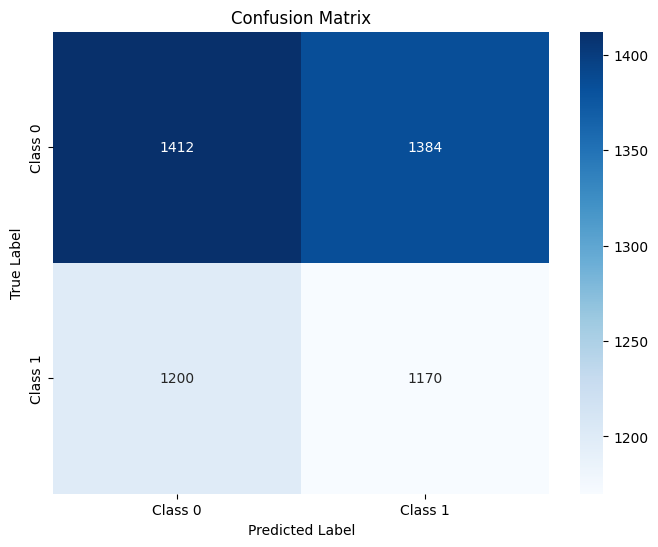

####################
Confusion Matrix Random Forest 0-1:


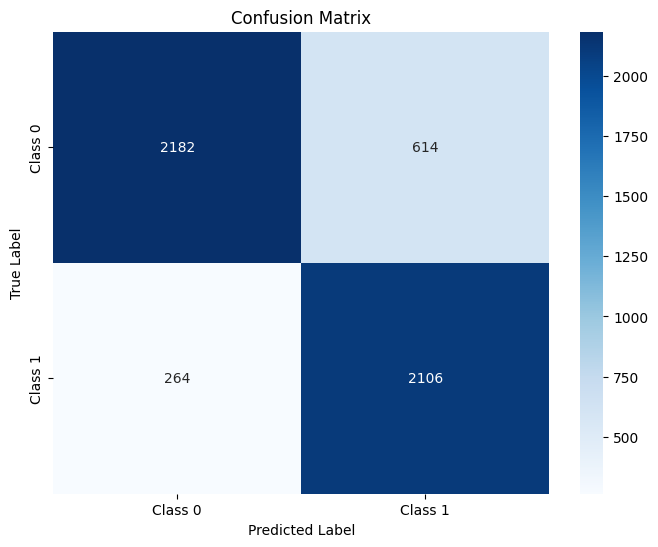

####################
Confusion Matrix XGBoost 0-1:


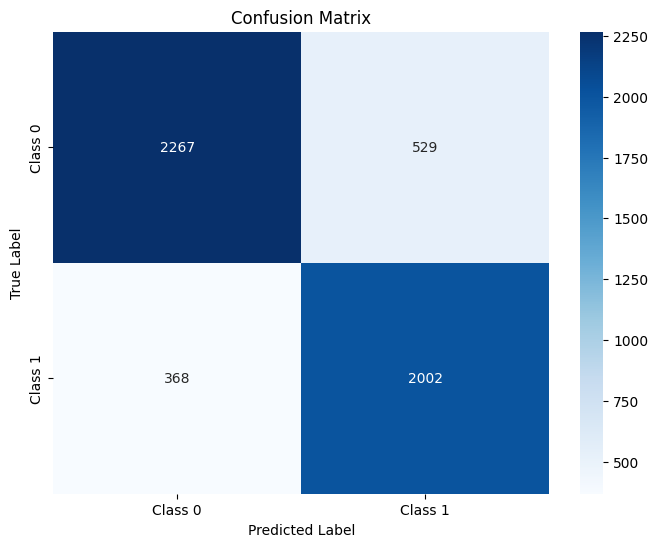

In [47]:
print('Confusion Matrix Baseline:')
show_confusion_matrix(test_y, pred_test_baseline)
print('#'*20)
print('Confusion Matrix Random Forest 0-1:')
show_confusion_matrix(test_y, pred_test)
print('#'*20)
print('Confusion Matrix XGBoost 0-1:')
show_confusion_matrix(test_y, pred_test_xgb)

ROC AUC curve Baseline:
####################
ROC AUC curve Random Forest 0-1:
####################
ROC AUC curve XGBoost 0-1:
####################
ROC AUC curve Random Forest Probabilities:
####################
ROC AUC curve XGBoost Probabilities:


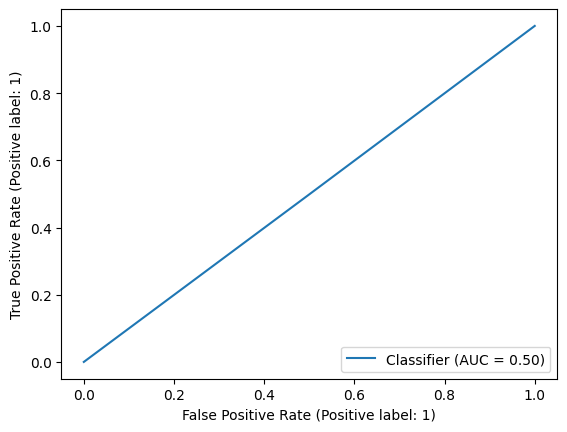

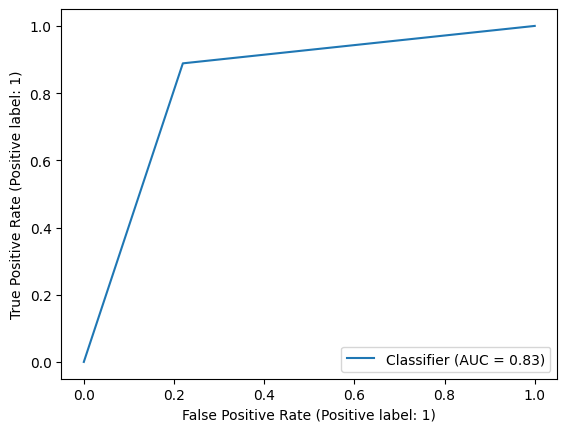

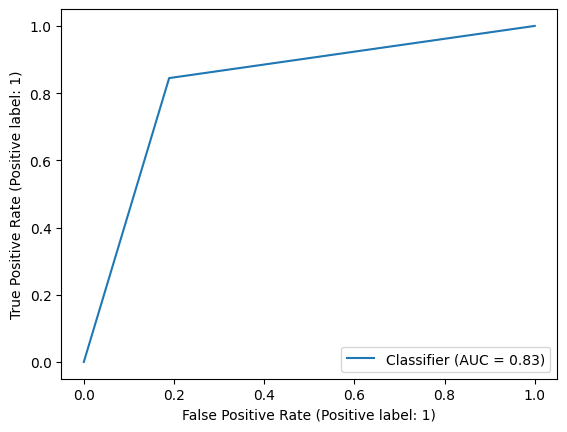

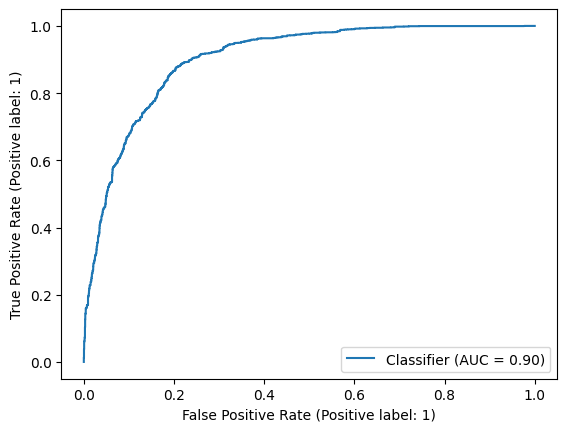

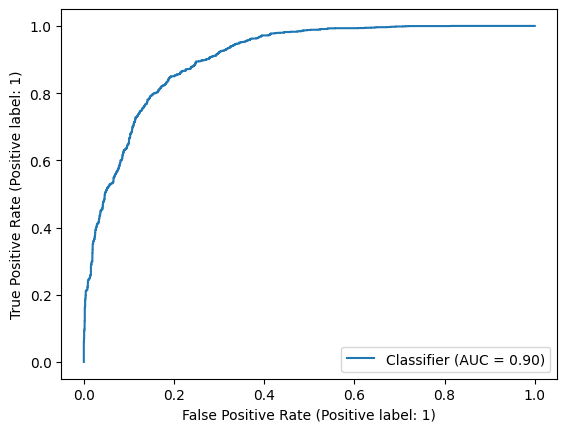

In [48]:
print('ROC AUC curve Baseline:')
print(RocCurveDisplay.from_predictions(test_y, pred_test_baseline))
print('#'*20)
print('ROC AUC curve Random Forest 0-1:')
print(RocCurveDisplay.from_predictions(test_y, pred_test))
print('#'*20)
print('ROC AUC curve XGBoost 0-1:')
print(RocCurveDisplay.from_predictions(test_y, pred_test_xgb))
print('#'*20)
print('ROC AUC curve Random Forest Probabilities:')
print(RocCurveDisplay.from_predictions(test_y, y_pred))
print('#'*20)
print('ROC AUC curve XGBoost Probabilities:')
print(RocCurveDisplay.from_predictions(test_y, y_pred_xgb))

In [49]:
# y_pred = model_stem.predict_proba(test_x)[:,1]
# y_pred_xgb = model_stem_xgb.predict_proba(test_x)[:,1]

y_pred_pv = model_rf.predict_proba(test_pv_x)[:,1]
y_pred_ej = model_rf.predict_proba(test_ej_x)[:,1]
y_pred_bp = model_rf.predict_proba(test_bp_x)[:,1]

y_pred_pv_xgb = model_xgb.predict_proba(test_pv_x)[:,1]
y_pred_ej_xgb = model_xgb.predict_proba(test_ej_x)[:,1]
y_pred_bp_xgb = model_xgb.predict_proba(test_bp_x)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Paral

In [50]:
test_df.columns

Index(['date', 'speaker_party', 'speaker_gender', 'speaker_id', 'term',
       'speech_text_preprocessed', 'party_in_power', 'speaker_age',
       'speech_text_preprocessed_tokenized', 'speech_text_preprocessed_len'],
      dtype='object')

# RESULTS PREPARATION

[Back to Index](#index)

In [51]:
pred_data_baseline = pd.DataFrame({'true': test_y, 'pred': pred_baseline, 'gender': test_df['speaker_gender'], 'term': test_df['term']})
pred_data = pd.DataFrame({'true': test_y, 'pred': y_pred, 'gender': test_df['speaker_gender'], 'term': test_df['term']})
pred_data_xgb = pd.DataFrame({'true': test_y, 'pred': y_pred_xgb, 'gender': test_df['speaker_gender'], 'term': test_df['term']})

pred_data_pv = pd.DataFrame({'true': test_pv_y, 'pred': y_pred_pv, 'gender': data_pv['speaker_gender'], 'term': data_pv['term']})
pred_data_ej = pd.DataFrame({'true': test_ej_y, 'pred': y_pred_ej, 'gender': data_ej['speaker_gender'], 'term': data_ej['term']})
pred_data_bp = pd.DataFrame({'true': test_bp_y, 'pred': y_pred_bp, 'gender': data_bp['speaker_gender'], 'term': data_bp['term']})

pred_data_pv_xgb = pd.DataFrame({'true': test_pv_y, 'pred': y_pred_pv_xgb, 'gender': data_pv['speaker_gender'], 'term': data_pv['term']})
pred_data_ej_xgb = pd.DataFrame({'true': test_ej_y, 'pred': y_pred_ej_xgb, 'gender': data_ej['speaker_gender'], 'term': data_ej['term']})
pred_data_bp_xgb = pd.DataFrame({'true': test_bp_y, 'pred': y_pred_bp_xgb, 'gender': data_bp['speaker_gender'], 'term': data_bp['term']})

In [52]:
display(pred_data)

,true,pred,gender,term
18,0,0.254002,0,4
19,1,0.435050,1,4
20,1,0.578274,0,4
21,1,0.578274,0,4
22,1,0.578274,0,4
...,...,...,...,...
15911,1,0.475598,1,2
15942,1,0.697369,0,2
15943,1,0.697369,0,2
15947,0,0.533508,1,2


In [53]:
male_pred = pred_data[pred_data['gender'] == 1]
fem_pred = pred_data[pred_data['gender'] == 0]

In [54]:
pred_data['term'].value_counts()

term
4    2484
2    1417
0     990
3     176
1      99
Name: count, dtype: int64

# RESULTS

[Back to Index](#index)

## PSOE-PP test df

[Back to Index](#index)

First from the baseline model, next from random forest and finally from xgboost.

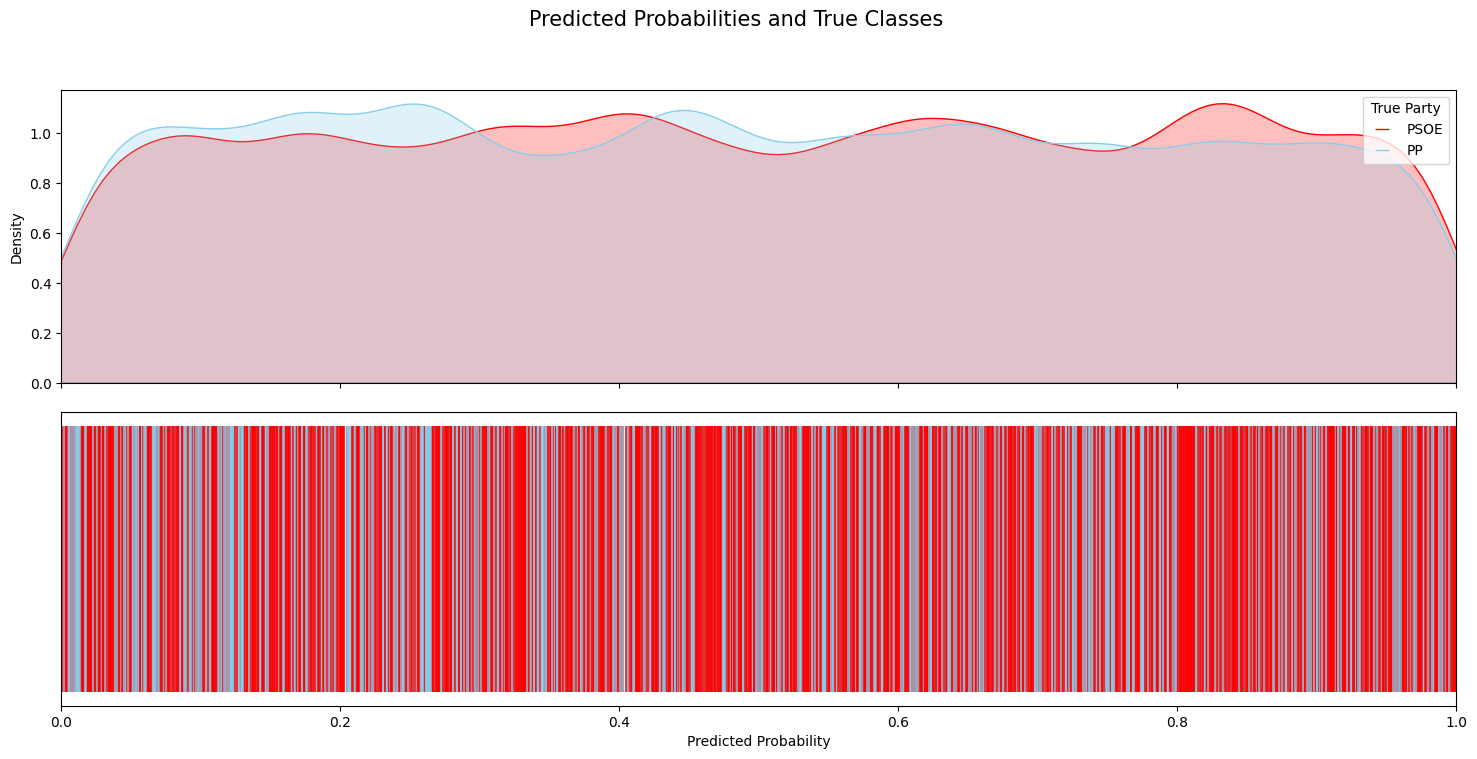

In [55]:
# # Two subplots
# fig, axes = plt.subplots(2, 1, figsize=(18, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.1})

# # Plot density plots for each class on the first subplot (axes[0])
# sns.kdeplot(data=pred_data_baseline[pred_data_baseline['true'] == 1]['pred'], ax=axes[0], color='skyblue', fill=True, bw_adjust=0.5)
# sns.kdeplot(data=pred_data_baseline[pred_data_baseline['true'] == 0]['pred'], ax=axes[0], color='red', fill=True, bw_adjust=0.5)
# axes[0].set_ylabel('Density')
# axes[0].set_ylim(bottom=0)

# # Custom legend for the bottom plot
# legend_class_0 = mlines.Line2D([], [], color='red', marker='_', linestyle='None', markersize=10, label='PSOE')
# legend_class_1 = mlines.Line2D([], [], color='skyblue', marker='_', linestyle='None', markersize=10, label='PP')
# axes[0].legend(handles=[legend_class_0, legend_class_1], title='True Party')

# # Plot vertical lines for each observation on the second subplot (axes[1])
# for _, row in pred_data_baseline.iterrows():
#     axes[1].vlines(row['pred'], ymin=0, ymax=1, color='skyblue' if row['true'] == 1 else 'red', alpha=0.7)


# # Common settings for the whole figure
# axes[1].set_xlabel('Predicted Probability')
# axes[1].set_yticks([])
# plt.xlim([0.0, 1.0])
# plt.suptitle('Predicted Probabilities and True Classes', fontsize=15)

# plt.show()

cool_party_plot(pred_data_baseline, 'red', 'skyblue', 'PSOE', 'PP')

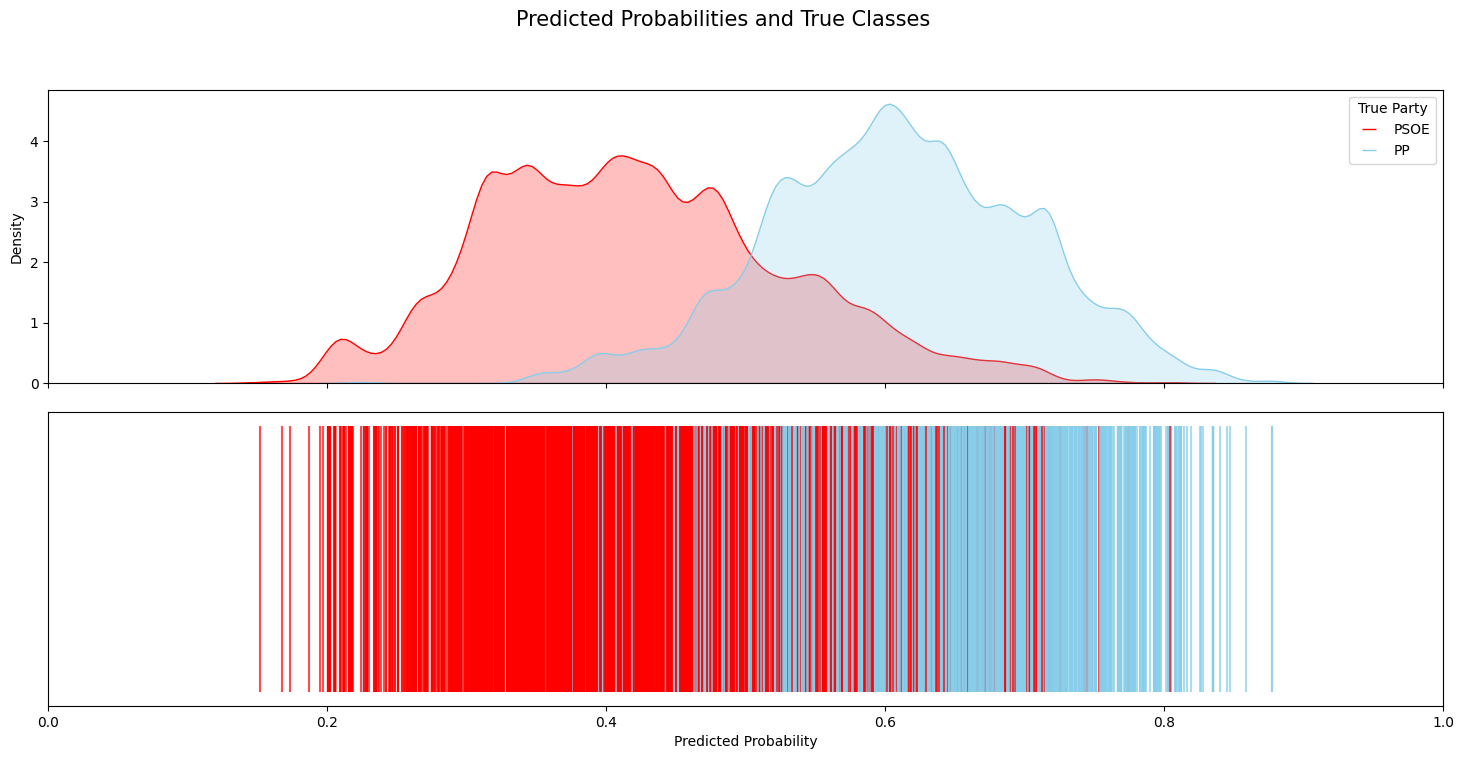

In [56]:
cool_party_plot(pred_data, 'red', 'skyblue', 'PSOE', 'PP')

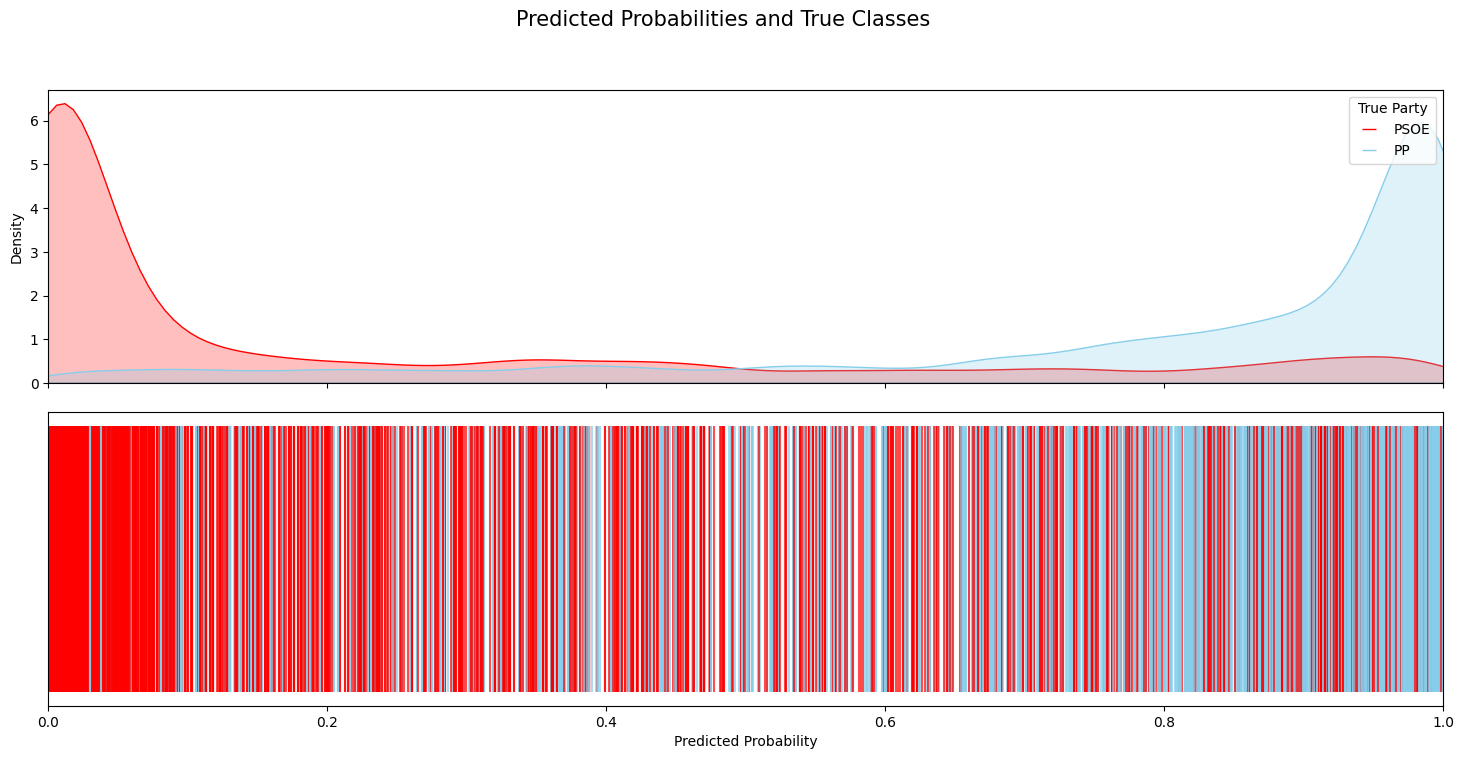

In [57]:
cool_party_plot(pred_data_xgb, 'red', 'skyblue', 'PSOE', 'PP')

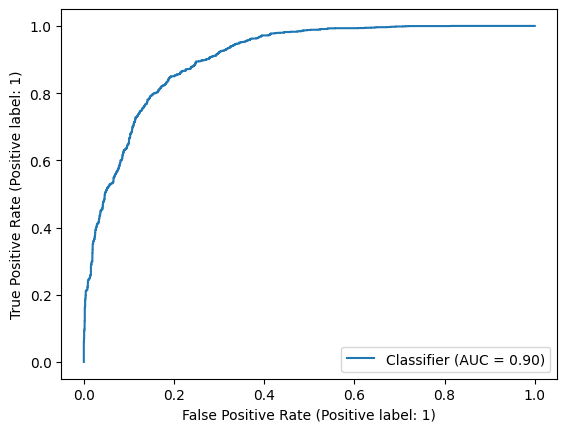

In [58]:
print(RocCurveDisplay.from_predictions(y_true = pred_data_xgb['true'], y_pred = pred_data_xgb['pred']))

In [59]:
pred_data_xgb

,true,pred,gender,term
18,0,0.000174,0,4
19,1,0.360184,1,4
20,1,0.946651,0,4
21,1,0.946651,0,4
22,1,0.946651,0,4
...,...,...,...,...
15911,1,0.500729,1,2
15942,1,0.983244,0,2
15943,1,0.983244,0,2
15947,0,0.835778,1,2


## Podemos-Vox test df

[Back to Index](#index)

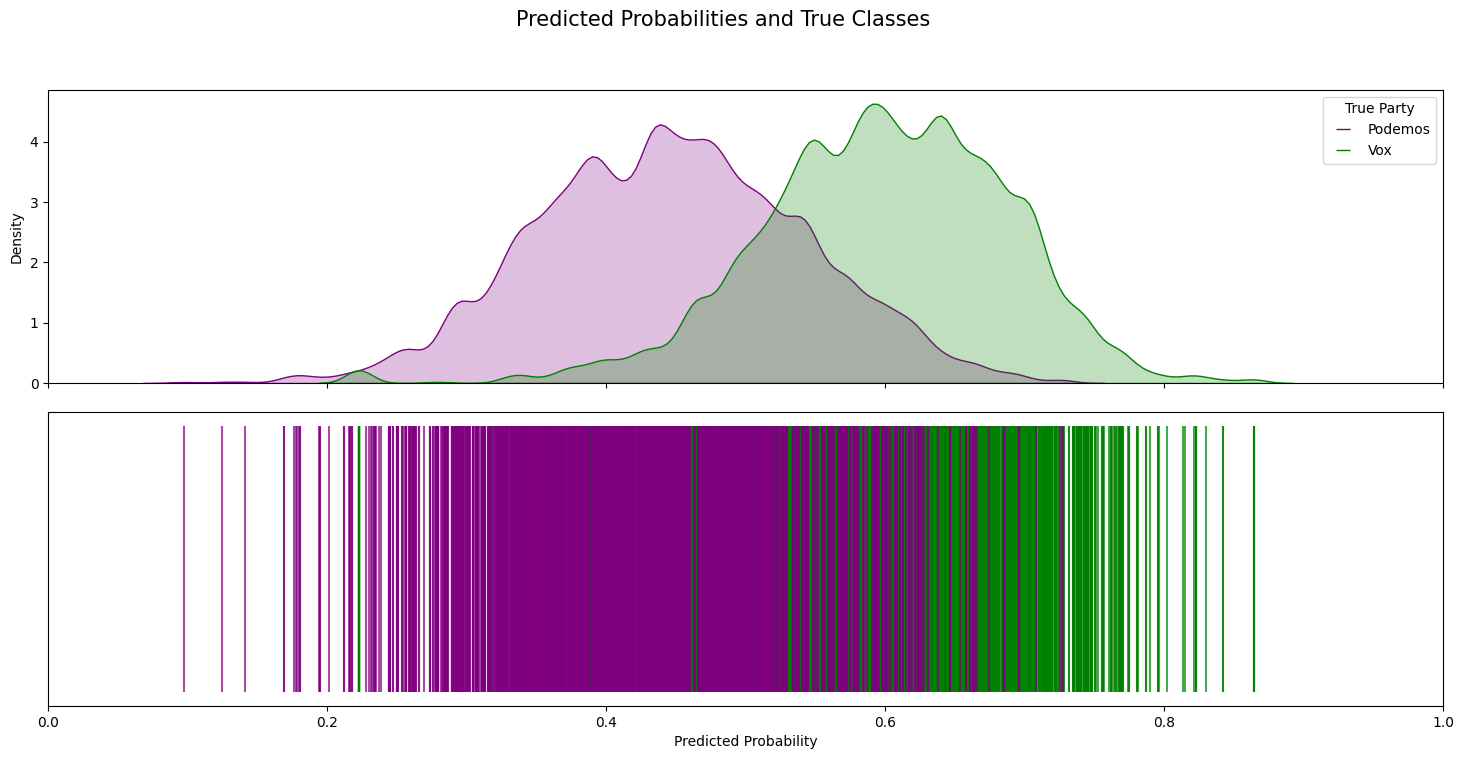

In [60]:
cool_party_plot(pred_data_pv, 'purple', 'green', 'Podemos', 'Vox')

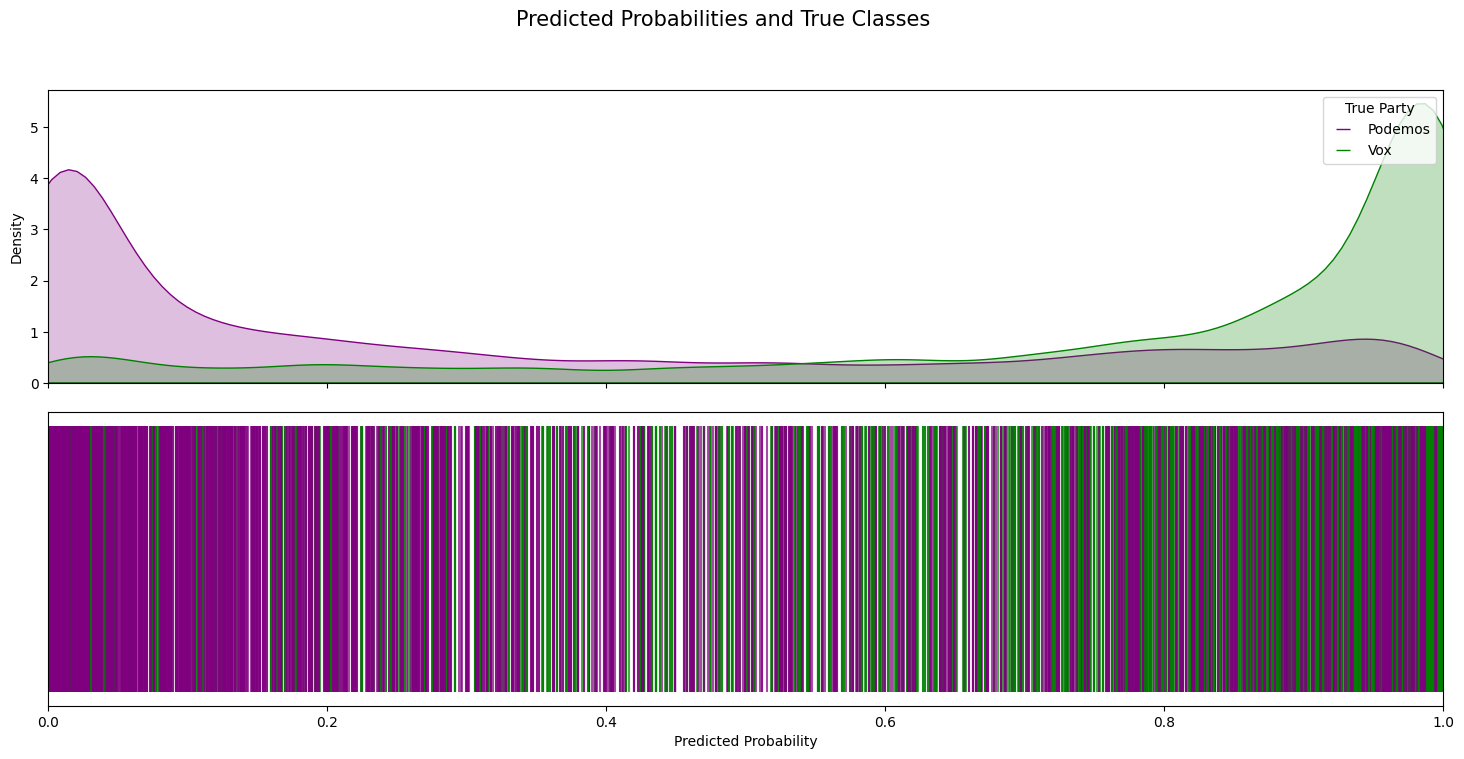

In [61]:
cool_party_plot(pred_data_pv_xgb, 'purple', 'green', 'Podemos', 'Vox')

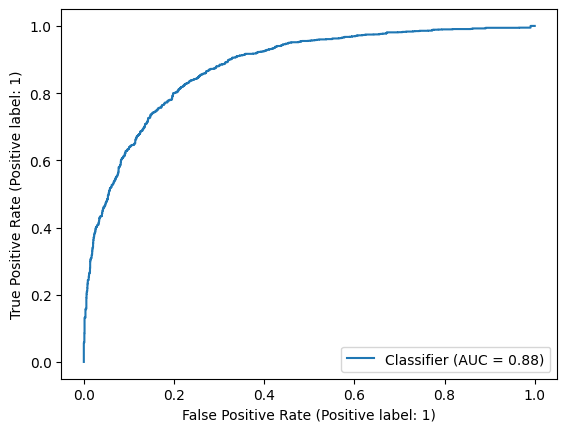

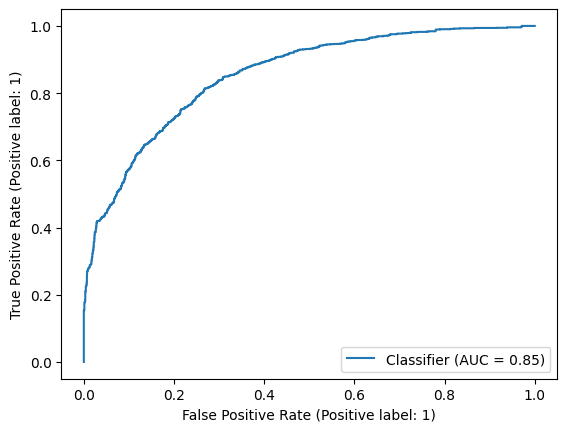

In [62]:
print(RocCurveDisplay.from_predictions(pred_data_pv['true'], pred_data_pv['pred']))
print(RocCurveDisplay.from_predictions(pred_data_pv_xgb['true'], pred_data_pv_xgb['pred']))

## ERC-JxCat test df

[Back to Index](#index)

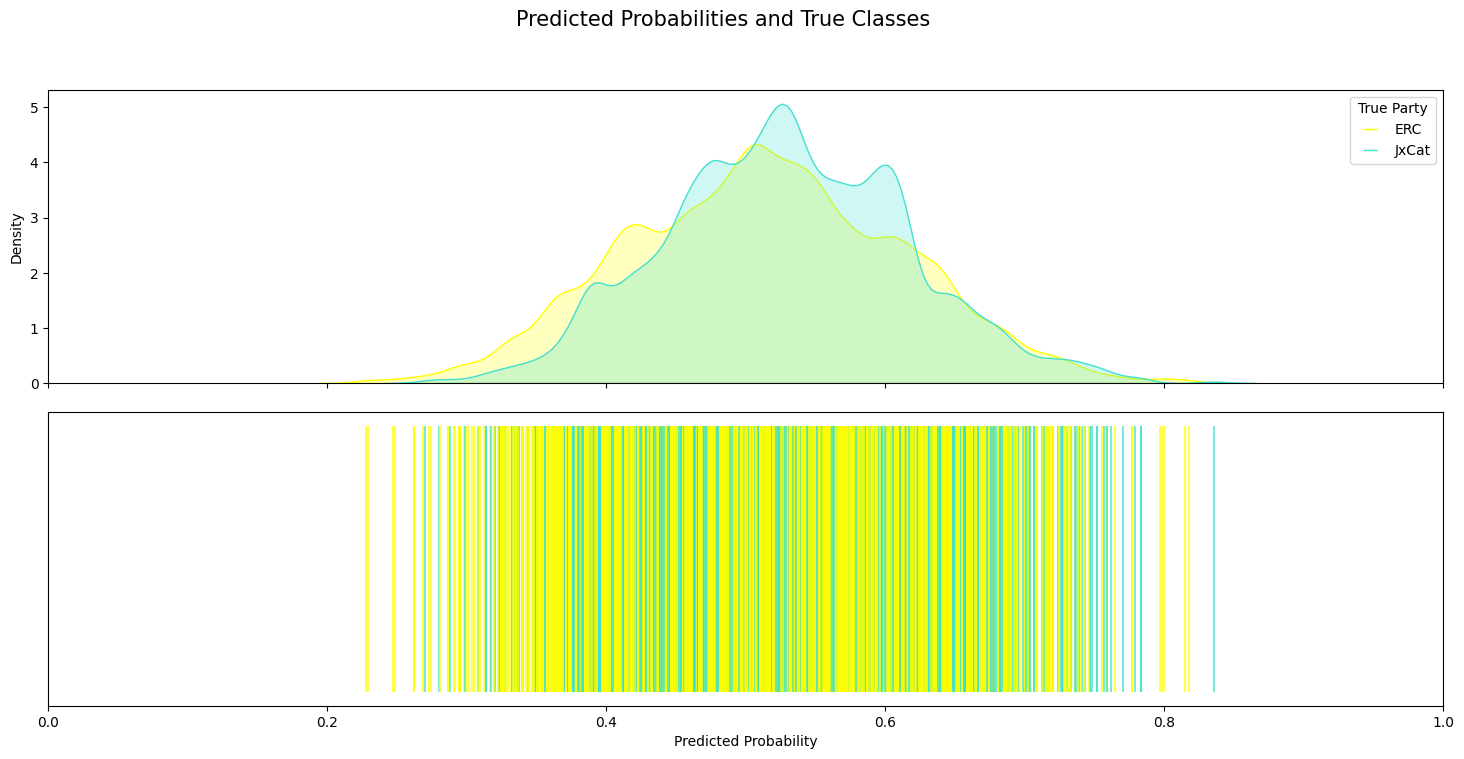

In [63]:
cool_party_plot(pred_data_ej, 'yellow', 'turquoise', 'ERC', 'JxCat')

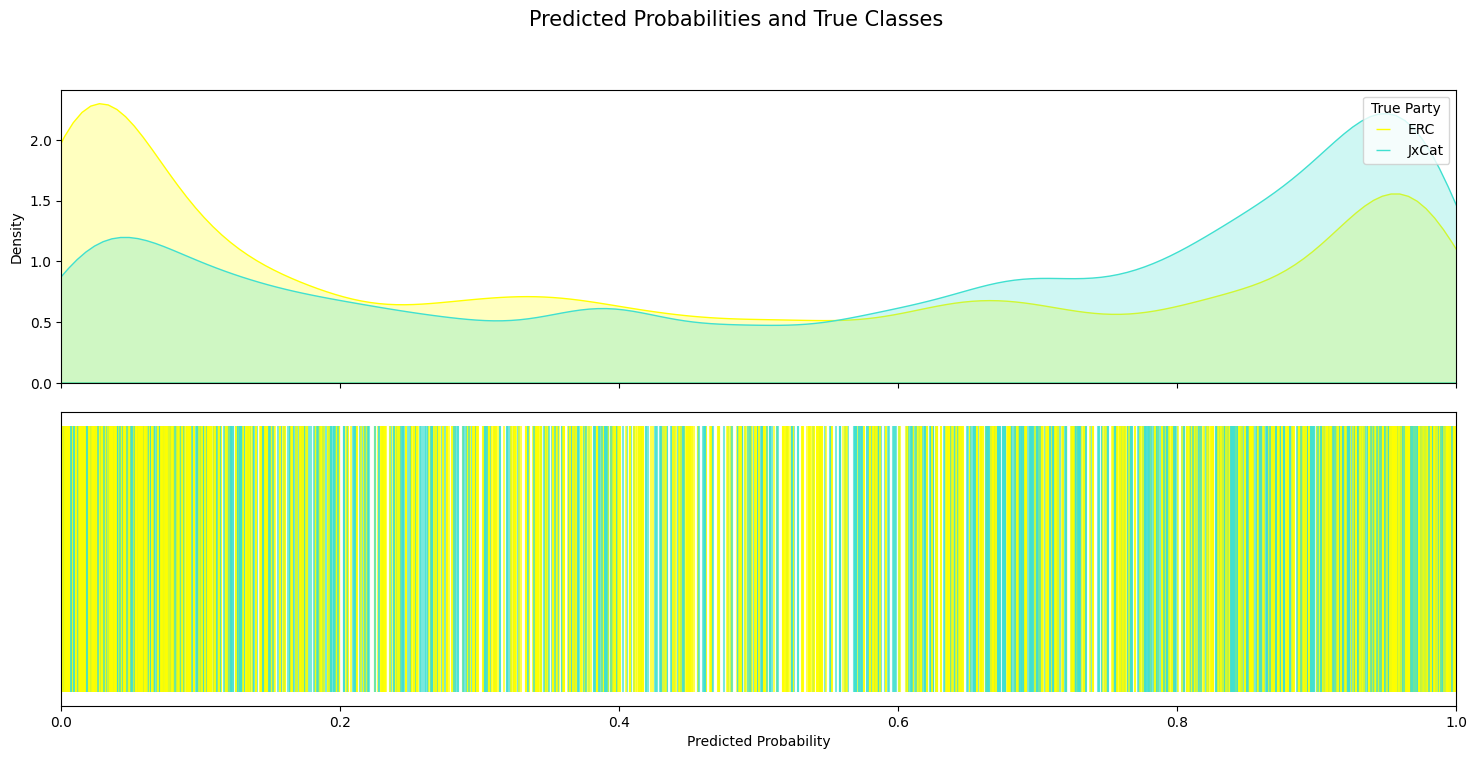

In [64]:
cool_party_plot(pred_data_ej_xgb, 'yellow', 'turquoise', 'ERC', 'JxCat')

## Bildu-PNV test df

[Back to Index](#index)

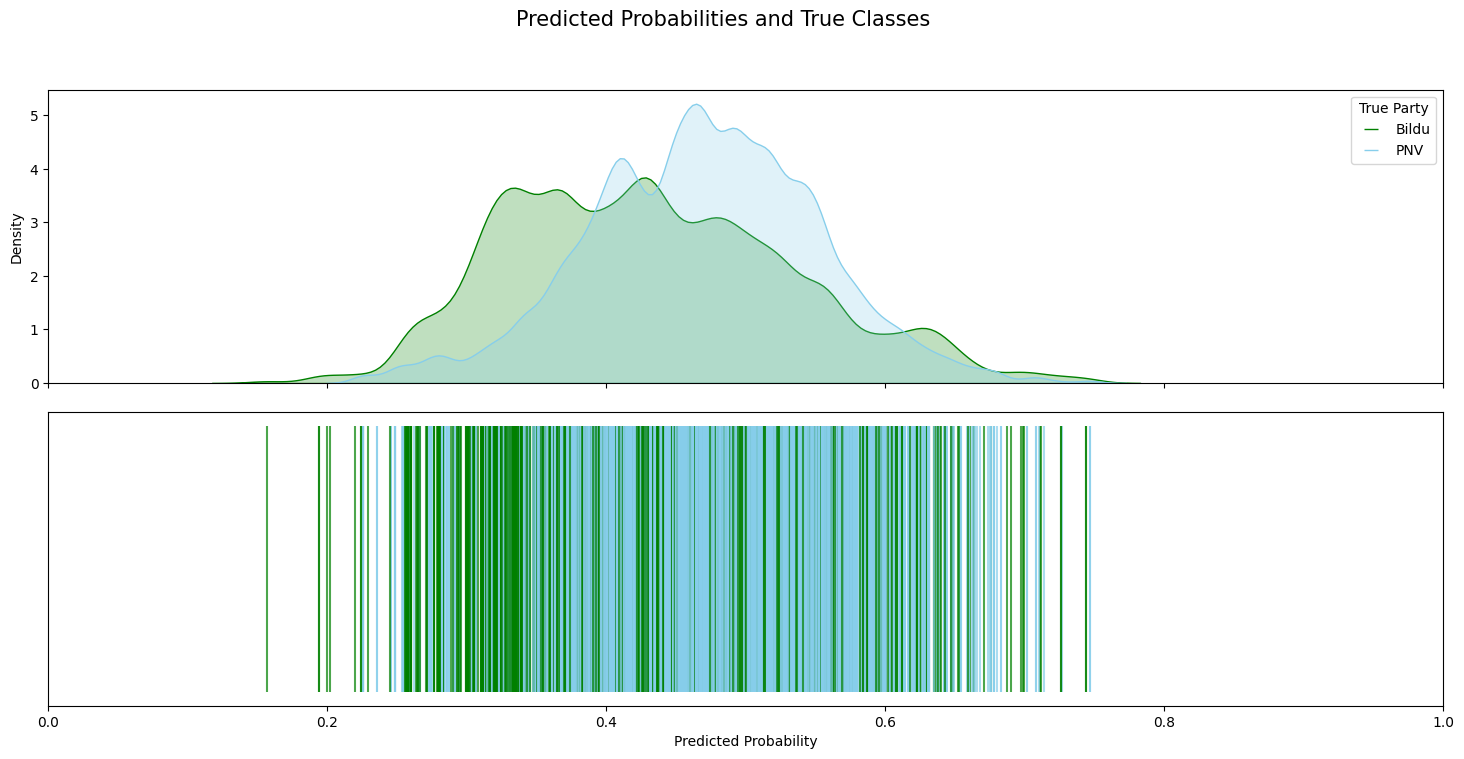

In [65]:
cool_party_plot(pred_data_bp, 'green', 'skyblue', 'Bildu', 'PNV')

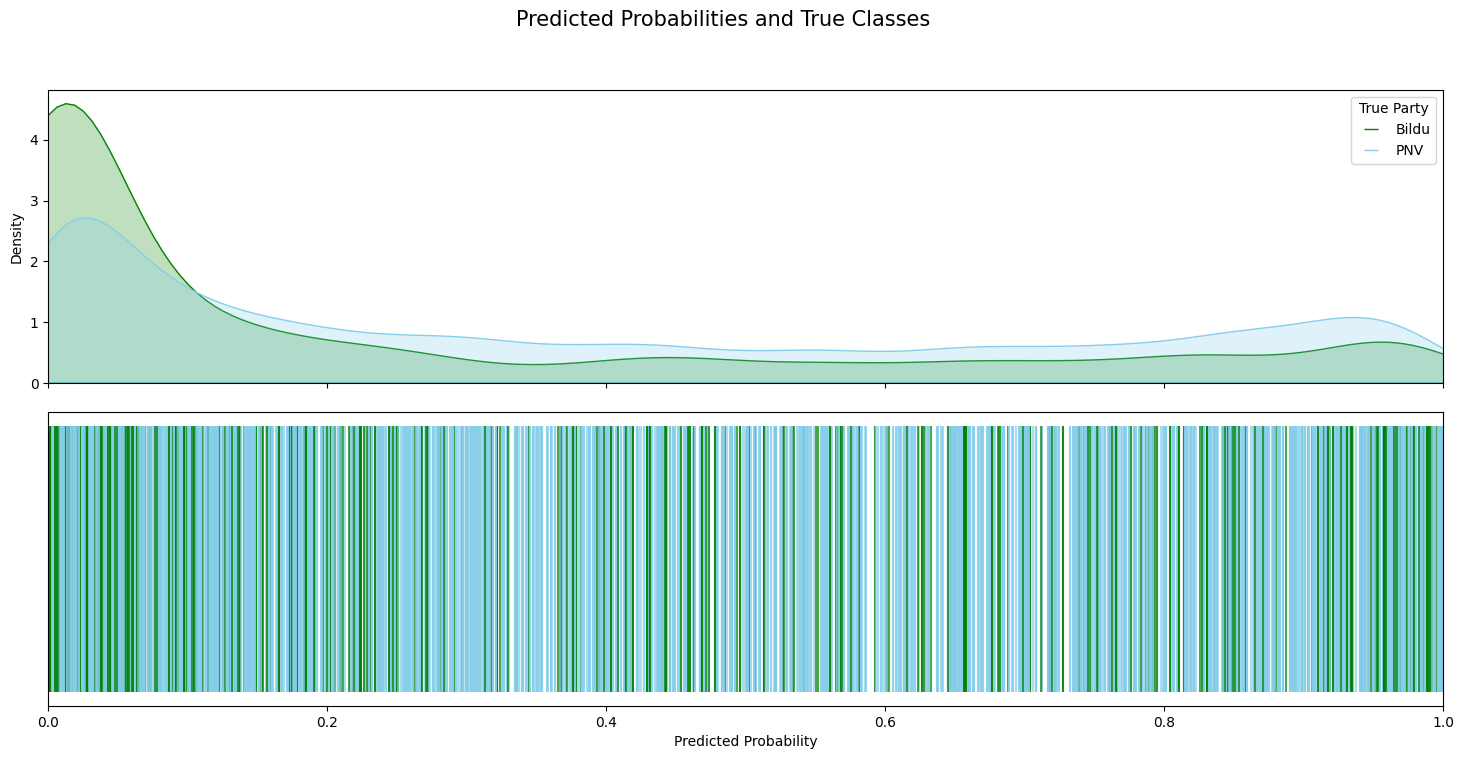

In [66]:
cool_party_plot(pred_data_bp_xgb, 'green', 'skyblue', 'Bildu', 'PNV')

## PSOE-PP only Male Politicians

[Back to Index](#index)

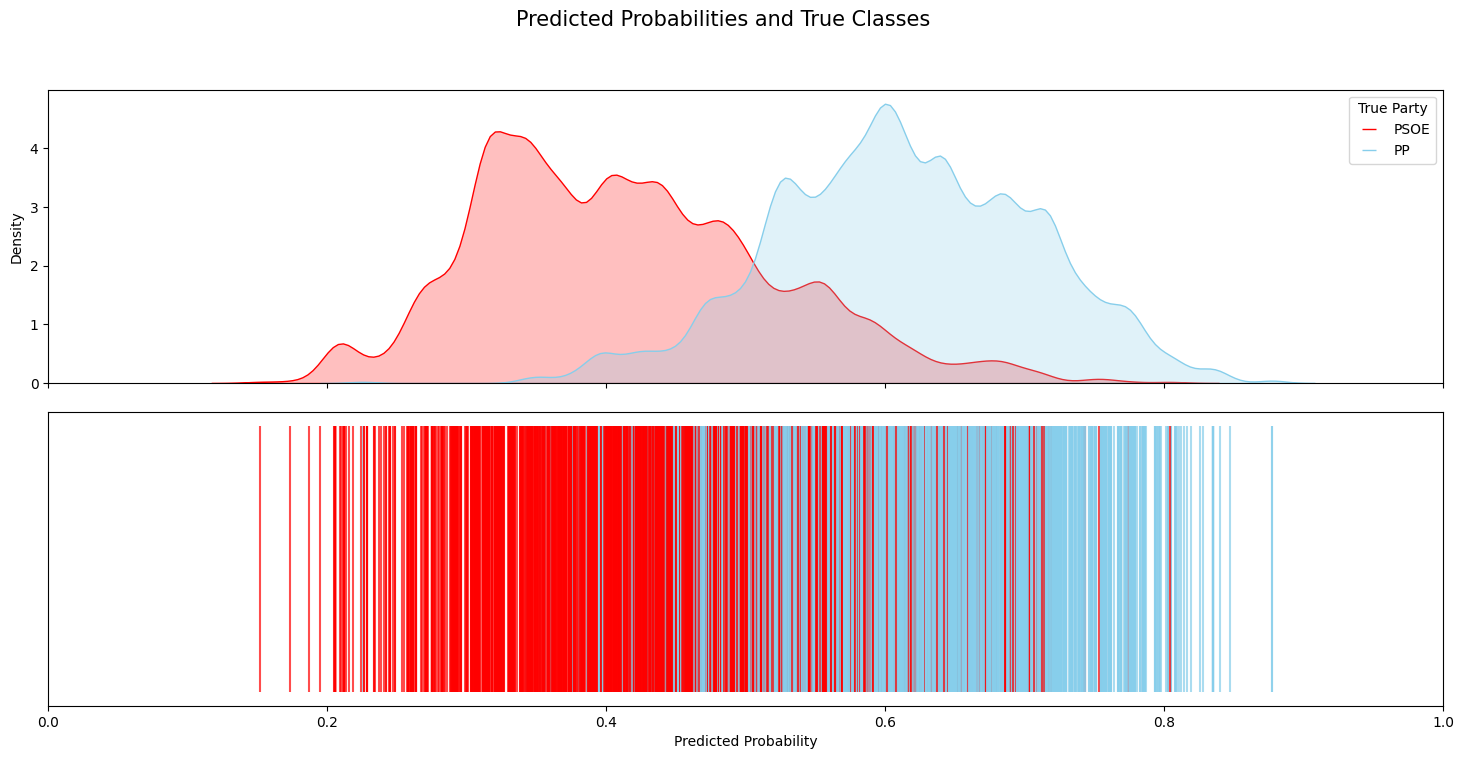

In [67]:
cool_party_plot(male_pred, 'red', 'skyblue', 'PSOE', 'PP')

## PSOE-PP Only Female Politicians

[Back to Index](#index)

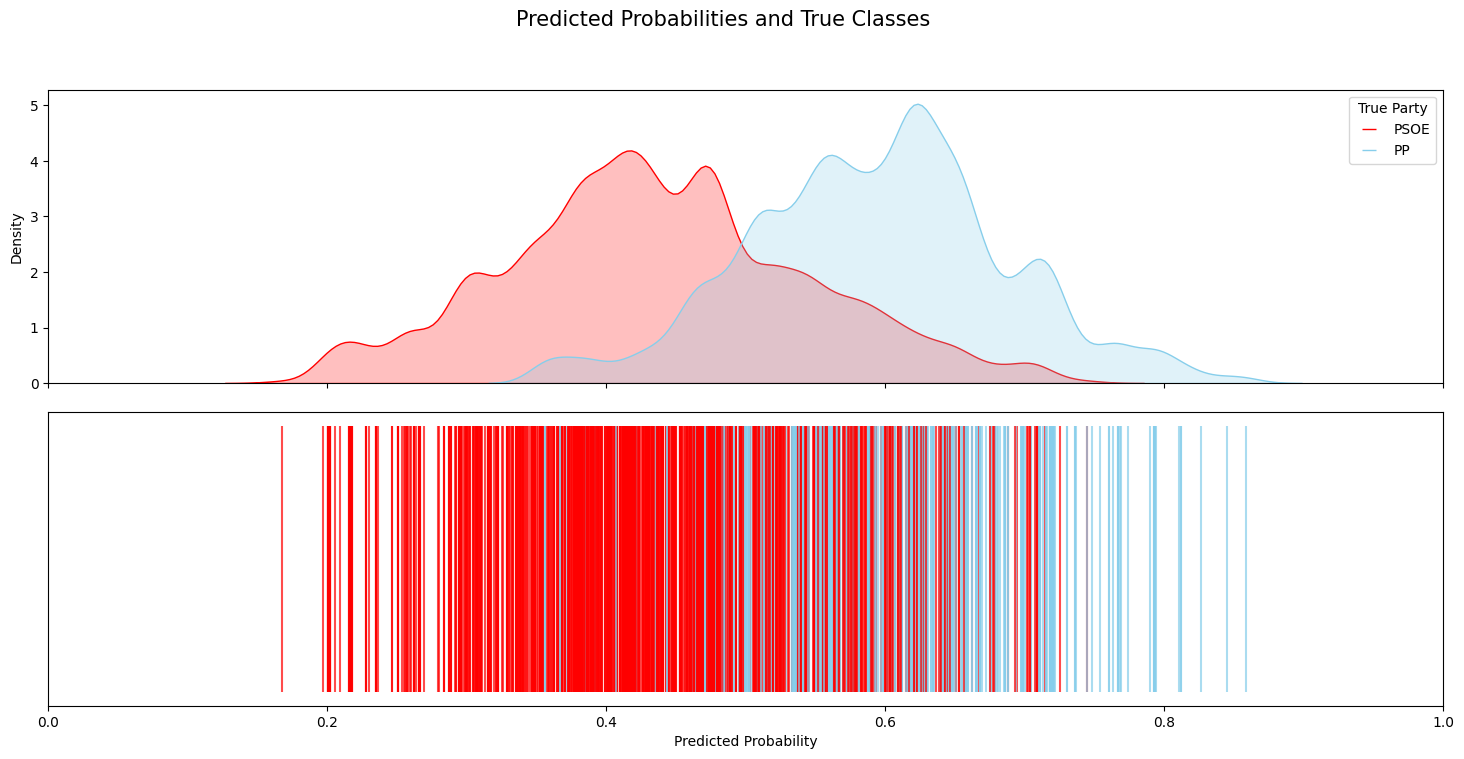

In [68]:
cool_party_plot(fem_pred, 'red', 'skyblue', 'PSOE', 'PP')

## Feature Importance Analysis

[Back to Index](#index)

In [69]:
# feature importance graph with plotly express
# Extract feature importances from the 'clf' step of the pipeline
importances = model_xgb.named_steps['clf'].feature_importances_
feature_names = model_xgb.named_steps['tfidf'].get_feature_names_out()
indices = np.argsort(importances)[::-1]


fig = px.bar(
    x=importances[indices][:20],
    y=[feature_names[i] for i in indices][:20],
    orientation='h',
    title='Top 20 Feature Importances',
    labels={'x': 'Importance', 'y': 'Feature'}
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# build dataframe with feature importances and feature names

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.to_csv('features_importances.csv', index=False)

In [ ]:
# Sorting features by their importance
indices = np.argsort(importances)[::-1]

# Selecting the top 100 words according to feature importance
top_50_importances = importances[indices][:50]
top_50_feature_names = [feature_names[i] for i in indices][:50]

# Creating a DataFrame for easier manipulation
df_top_50 = pd.DataFrame({
    'Feature': top_50_feature_names,
    'Importance': top_50_importances
})

# Now, to create a LaTeX table with the top 100 words in multiple columns, let's aim for a 4-column table.
# We'll reshape the DataFrame accordingly.

# Reshaping the DataFrame to have 4 columns for the LaTeX table
# The previous approach led to an error due to varying lengths of columns when dividing the top 100 features into three columns.
# Let's correct this by padding the shorter columns with empty strings to match the longest column's length.

# Calculating the exact numbers for three columns
num_rows = int(np.ceil(len(df_top_50) / 3))

# Creating arrays for each column, padding with empty strings where necessary
column_1 = df_top_50['Feature'][:num_rows].tolist() + [''] * (num_rows - len(df_top_50['Feature'][:num_rows]))
column_2 = df_top_50['Feature'][num_rows:2*num_rows].tolist() + [''] * (num_rows - len(df_top_50['Feature'][num_rows:2*num_rows]))
column_3 = df_top_50['Feature'][2*num_rows:3*num_rows].tolist() + [''] * (num_rows - len(df_top_50['Feature'][2*num_rows:3*num_rows]))

# To include the feature importance number as a column after each word column, 
# we need to adjust the DataFrame creation to account for these additional columns.

# Extending the DataFrame to include importance values next to each feature name
reshaped_with_importance = pd.DataFrame({
    'Feature 1': column_1,
    'Importance 1': df_top_50['Importance'][:num_rows].tolist() + [''] * (num_rows - len(df_top_50['Importance'][:num_rows])),
    'Feature 2': column_2,
    'Importance 2': df_top_50['Importance'][num_rows:2*num_rows].tolist() + [''] * (num_rows - len(df_top_50['Importance'][num_rows:2*num_rows])),
    'Feature 3': column_3,
    'Importance 3': df_top_50['Importance'][2*num_rows:3*num_rows].tolist() + [''] * (num_rows - len(df_top_50['Importance'][2*num_rows:3*num_rows])),
})

# Generating the LaTeX table code with importance numbers included
latex_table_with_importance = reshaped_with_importance.to_latex(index=False, escape=False)

print(latex_table_with_importance)


\begin{tabular}{lrlrll}
\toprule
Feature 1 & Importance 1 & Feature 2 & Importance 2 & Feature 3 & Importance 3 \\
\midrule
derecha & 0.038142 & izquierda & 0.004678 & término & 0.002546 \\
ciudadanía & 0.024661 & asunto & 0.004543 & comentar & 0.002514 \\
transformación & 0.011111 & elemento & 0.004511 & proyecto presupuesto & 0.002503 \\
socio & 0.010764 & 2016 & 0.004418 & millón español & 0.002464 \\
crear empleo & 0.008942 & recortar & 0.004065 & convalidación real & 0.002435 \\
cuestión & 0.008694 & ultraderecha & 0.004033 & mundo & 0.002373 \\
evidentemente & 0.008617 & extraordinario & 0.003891 & español española & 0.002241 \\
diputado bien & 0.007627 & digno & 0.003856 & pagar & 0.002240 \\
transición & 0.007456 & destruir & 0.003501 & español tener & 0.002175 \\
respecto & 0.007144 & indicar & 0.003105 & ciudadano ciudadana & 0.002162 \\
creación empleo & 0.006475 & colectivo & 0.003102 & historia & 0.002135 \\
pandemia & 0.006063 & inversión & 0.003018 & periodo & 0.002118 \